# ASSESSING GREENHOUSE EMISSION WITH MACHINE LEARNING

## Preprocessing the data

First of all we need to look at our data set

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
data = pd.read_csv(r'C:\Users\idine\OneDrive\Документы\Курсовая\greenhouse_gas_inventory_data_data(1).csv')
data.head()

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


As we can see, we have 4 fields: country, year, value, category. Let's find unique values and number of them

In [42]:
unique_countries = data['country_or_area'].unique()
unique_countries_number = len(unique_countries)
unique_year = data['year'].unique()
unique_year_number = len(unique_year)
unique_category = data['category'].unique()
unique_countries_number = len(unique_category)

In [43]:
print(f"Number of countries: {unique_countries_number}\nUnique countries: {unique_countries}" )

Number of countries: 10
Unique countries: ['Australia' 'Austria' 'Belarus' 'Belgium' 'Bulgaria' 'Canada' 'Croatia'
 'Cyprus' 'Czech Republic' 'Denmark' 'Estonia' 'European Union' 'Finland'
 'France' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Japan'
 'Latvia' 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Malta' 'Monaco'
 'Netherlands' 'New Zealand' 'Norway' 'Poland' 'Portugal' 'Romania'
 'Russian Federation' 'Slovakia' 'Slovenia' 'Spain' 'Sweden' 'Switzerland'
 'Turkey' 'Ukraine' 'United Kingdom' 'United States of America']


In [44]:
print(f"Number of years: {unique_year_number}\nUnique years: {unique_year}" )

Number of years: 25
Unique years: [2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000 1999 1998 1997 1996 1995 1994 1993 1992 1991 1990]


In [45]:
print(f"Number of categories: {unique_countries_number}\nUnique categories: {unique_category}" )

Number of categories: 10
Unique categories: ['carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'
 'greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent'
 'greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'
 'hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent'
 'methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'
 'nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent'
 'nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'
 'perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent'
 'sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent'
 'unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent']


Let's take a look at the one country more closely

In [74]:
print(data[data['country_or_area'] == 'Australia'])

     country_or_area  year          value  \
0          Australia  2014  393126.946994   
1          Australia  2013  396913.936530   
2          Australia  2012  406462.847704   
3          Australia  2011  403705.528314   
4          Australia  2010  406200.993184   
...              ...   ...            ...   
7319       Australia  1994     282.640896   
7320       Australia  1993     264.759156   
7321       Australia  1992     246.858849   
7322       Australia  1991     228.944834   
7323       Australia  1990     211.018511   

                                               category  
0     carbon_dioxide_co2_emissions_without_land_use_...  
1     carbon_dioxide_co2_emissions_without_land_use_...  
2     carbon_dioxide_co2_emissions_without_land_use_...  
3     carbon_dioxide_co2_emissions_without_land_use_...  
4     carbon_dioxide_co2_emissions_without_land_use_...  
...                                                 ...  
7319  sulphur_hexafluoride_sf6_emissions_in_kilotonn.

Here we can find one interesting feature of this data set: data about country is given not only by every year, but also by every category of emission. That means we will need to build many models, for every category of emission, to give more accurate prediction. As if we will unite categories and sum value by every year, we won't take into account that different categories may have different behaviour

Also let's take a look at the relation between year and value of emission.

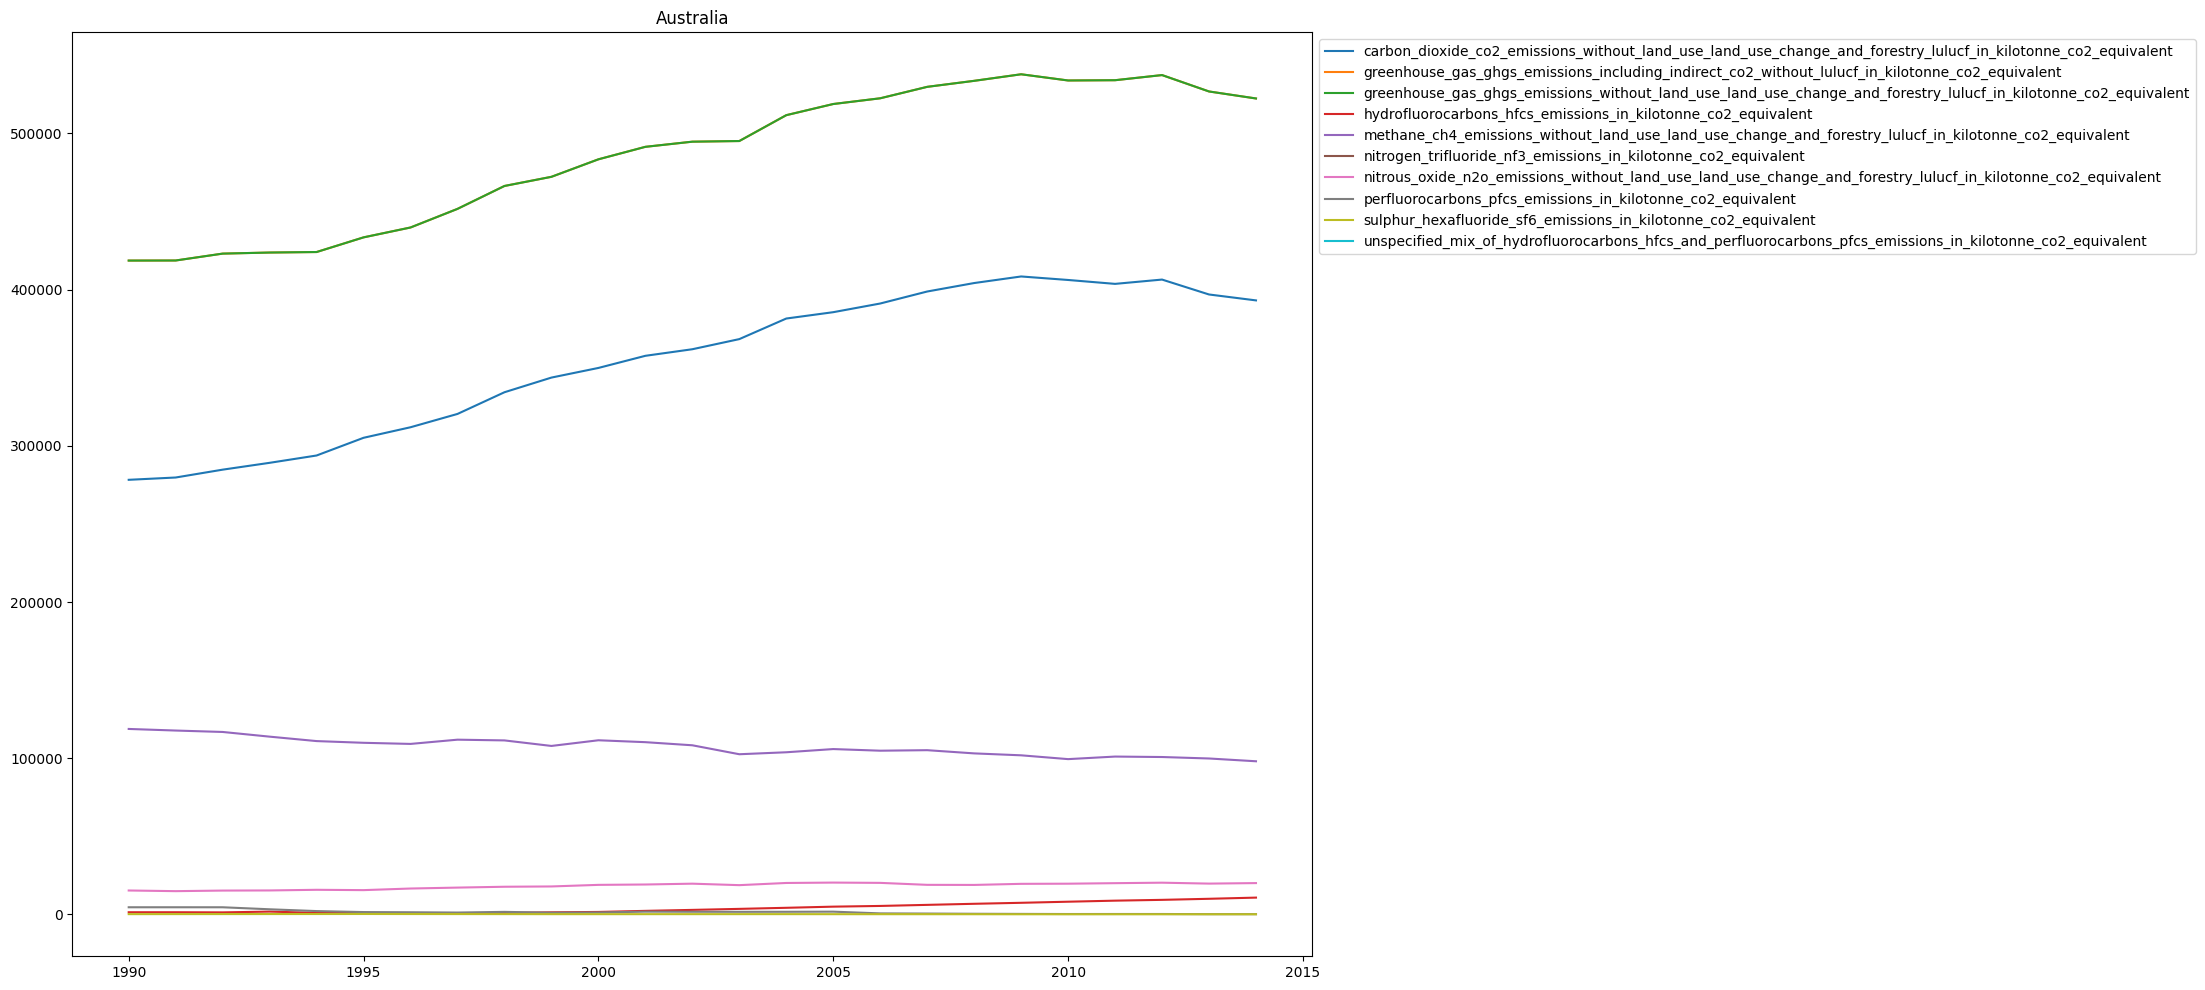

In [87]:
plt.rcParams["figure.figsize"] = [16, 12]

table = pd.pivot_table(data, values='value', index=['country_or_area', 'year'], columns=['category'])
gasnames = table.columns.values


def country_plot(nameOfCountry):
    data = table.loc[nameOfCountry]
    plt.plot(data)
    plt.legend(gasnames, bbox_to_anchor=(1, 1))
    plt.title(nameOfCountry)
country_plot('Australia')

## Chossing machine learning model

 As we can see from this graph, relation between emission and year is not linear, so we need to use machine learning model based on the nonlinear regression. So we have two most appropriate ways: using Random Forest regressor or model based on the Time Series. Let's first try Random Forest

## Random forest regressor

In [88]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv(r'C:\Users\idine\OneDrive\Документы\Курсовая\greenhouse_gas_inventory_data_data(1).csv')

# List to store the predicted values and MSE for each country
predictions = []

# Group the data by country and category
grouped_data = data.groupby(['country_or_area', 'category'])

# Loop through each group
for (country, category), group in grouped_data:
    # Separate the features (year) and target variable (value)
    X = group[['year']]
    y = group['value']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and fit the random forest model
    model = RandomForestRegressor(n_estimators = 50, random_state=42)
    model.fit(X_train, y_train)

    # Predict the values for the next years
    future_years = pd.DataFrame({'year': [2015, 2016, 2017]})  # Adjust the years as needed
    category_predictions = model.predict(future_years)

    # Calculate MSE between predicted values and actual test values
    mse = mean_squared_error(y_test, model.predict(X_test))
    rmse = mse ** 0.5

    # Store the predictions, MSE, country, category, and year
    for year, prediction in zip(future_years['year'], category_predictions):
        predictions.append({
            'country': country,
            'category': category,
            'year': year,
            'value': prediction,
            'mse': mse,
            'rmse': rmse
        })

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(predictions)

# Print the predicted values and MSE for each country, category, and year
print(predictions_df)

                       country  \
0                    Australia   
1                    Australia   
2                    Australia   
3                    Australia   
4                    Australia   
...                        ...   
1045  United States of America   
1046  United States of America   
1047  United States of America   
1048  United States of America   
1049  United States of America   

                                               category  year          value  \
0     carbon_dioxide_co2_emissions_without_land_use_...  2015  399215.503001   
1     carbon_dioxide_co2_emissions_without_land_use_...  2016  399215.503001   
2     carbon_dioxide_co2_emissions_without_land_use_...  2017  399215.503001   
3     greenhouse_gas_ghgs_emissions_including_indire...  2015  529206.467879   
4     greenhouse_gas_ghgs_emissions_including_indire...  2016  529206.467879   
...                                                 ...   ...            ...   
1045  sulphur_hexafluoride_sf6_

## Time Series forecasting

In [167]:
import pandas as pd
from prophet import Prophet
import logging, sys
logging.disable(sys.maxsize)ч

# Load the dataset
data = pd.read_csv(r'C:\Users\idine\OneDrive\Документы\Курсовая\greenhouse_gas_inventory_data_data(1).csv')

# List to store the predicted values and MSE for each country
predictions = []

# Group the data by country and category
grouped_data = data.groupby(['country_or_area', 'category'])

# Loop through each group
for (country, category), group in grouped_data:
    # Separate the features (year) and target variable (value)
    group = group.rename(columns={'year': 'ds', 'value': 'y'})
    group['ds'] = pd.to_datetime(group['ds'], format='%Y')  # convert year to datetime

    # Create and fit the Prophet model
    model = Prophet()
    model.fit(group)

    # Predict the values for the next years
    future_years = model.make_future_dataframe(periods=15, freq='Y')  # Adjust the years as needed
    forecast = model.predict(future_years)

    # Store the predictions, country, category, and year
    for row in forecast[['ds', 'yhat']].itertuples():
        if row.ds.year in [2015, 2016, 2017, 2018, 2019]:
            predictions.append({
                'country': country,
                'category': category,
                'year': row.ds.year,
                'value': row.yhat,
            })

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(predictions)

# Print the predicted values for each country, category, and year
print(predictions_df)

                       country  \
0                    Australia   
1                    Australia   
2                    Australia   
3                    Australia   
4                    Australia   
...                        ...   
1745  United States of America   
1746  United States of America   
1747  United States of America   
1748  United States of America   
1749  United States of America   

                                               category  year          value  
0     carbon_dioxide_co2_emissions_without_land_use_...  2015  404319.397277  
1     carbon_dioxide_co2_emissions_without_land_use_...  2016  391202.724821  
2     carbon_dioxide_co2_emissions_without_land_use_...  2017  391268.727367  
3     carbon_dioxide_co2_emissions_without_land_use_...  2018  392024.605822  
4     carbon_dioxide_co2_emissions_without_land_use_...  2019  393467.417768  
...                                                 ...   ...            ...  
1745  unspecified_mix_of_hydrofluoroca

## Visualization and evaluating of results

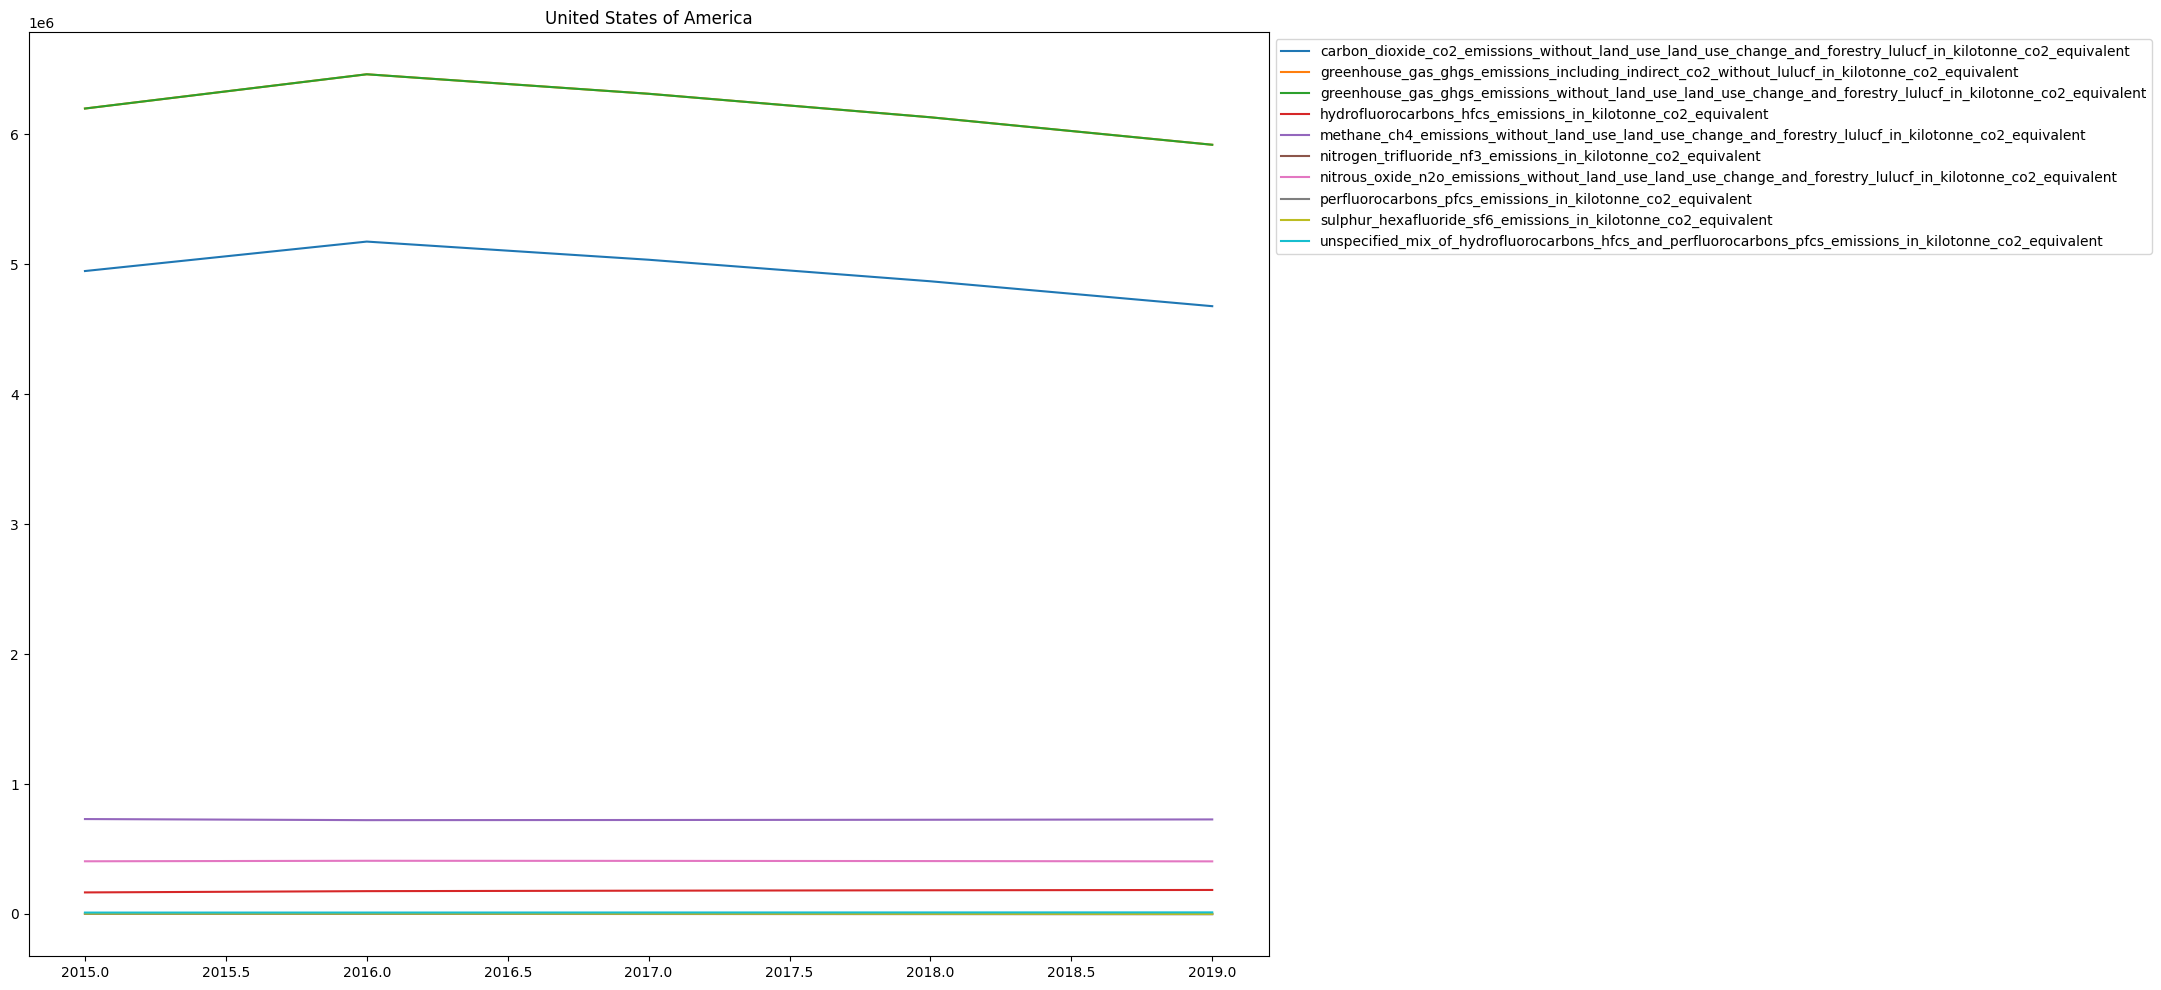

In [173]:
plt.rcParams["figure.figsize"] = [16, 12]

table_predictions = pd.pivot_table(predictions_df, values='value', index=['country', 'year'], columns=['category'])
gasnames = table_predictions.columns.values


def country_plot(nameOfCountry):
    data = table_predictions.loc[nameOfCountry]
    plt.plot(data)
    plt.legend(gasnames, bbox_to_anchor=(1, 1))
    plt.title(nameOfCountry)
country_plot('United States of America')

As we can see from this graph, on example of United States of America, Emission will decrease signifacantly in the next years. We can assume, that this connected to the government policy of ecology protection. Anyway, we can't deny that the trend on 

In [166]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

# Load the dataset
data = pd.read_csv(r'C:\Users\idine\OneDrive\Документы\Курсовая\greenhouse_gas_inventory_data_data(1).csv')

# List to store the predicted values and MAPE for each country
predictions = []

# Group the data by country and category
grouped_data = data.groupby(['country_or_area', 'category'])

# Loop through each group
for (country, category), group in grouped_data:
    n = 21
    # Separate the features (year) and target variable (value)
    group = group.rename(columns={'year': 'ds', 'value': 'y'})
    group['ds'] = pd.to_datetime(group['ds'], format='%Y')  # convert year to datetime
    # Split the data into training and test sets
    test = group[:-n]
    train = group[-n:]
#     print(len(test))
    # Create and fit the Prophet model
    model = Prophet()
    model.fit(train) 

    # Predict the values for the next years
    future_years = model.make_future_dataframe(periods=8, freq='Y')  # Adjust the years as needed
    forecast = model.predict(future_years)

# #     # Calculate MAPE between predicted values and actual test values
#     forecasted_test = forecast[forecast['ds'].dt.year.isin(test['ds'].dt.year)]
#     print(len(forecasted_test), forecast['ds'], category)
#     mape = mean_absolute_percentage_error(test['y'], forecasted_test['yhat'])

    # Store the predictions, MAPE, country, category, and year
    for row in forecast[['ds', 'yhat']].itertuples():
        if row.ds.year in [2015, 2016, 2017, 2018]:
            predictions.append({
                'country': country,
                'category': category,
                'year': row.ds.year,
                'value': row.yhat,
            })

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(predictions)

# Print the predicted values and MAPE for each country, category, and year
print(predictions_df)

                       country  \
0                    Australia   
1                    Australia   
2                    Australia   
3                    Australia   
4                    Australia   
...                        ...   
1080  United States of America   
1081  United States of America   
1082  United States of America   
1083  United States of America   
1084  United States of America   

                                               category  year          value  
0     carbon_dioxide_co2_emissions_without_land_use_...  2015  450904.771146  
1     carbon_dioxide_co2_emissions_without_land_use_...  2016  448546.797349  
2     carbon_dioxide_co2_emissions_without_land_use_...  2017  455465.278265  
3     greenhouse_gas_ghgs_emissions_including_indire...  2015  591419.800982  
4     greenhouse_gas_ghgs_emissions_including_indire...  2016  575273.750277  
...                                                 ...   ...            ...  
1080  sulphur_hexafluoride_sf6_emissio

1
